<a href="https://colab.research.google.com/github/FreMeli/Colab/blob/main/Act_14_L%C3%B3pez_Flores_Freya_Melissa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumno:**Freya Melissa López Flores

**No. de cuenta:** A225952-0

**Profesor:** Lázaro Bustio Martínez

**Fecha de entrega:** 06/03/2023

**Objetivo:** El objetivo de esta tarea es desarrollar los análisis de estadística descriptiva para los elementos del siguiente artículo: https://medium.com/data-science-everywhere/explore-your-data-exploratory-data-analysis-8b54dfdfb898


## 1. Importing the required libraries for EDA (Exploratory Data Analysis)

In [ ]:
import numpy as np
import pandas as pd #Importamos la libreria pandas
from google.colab import files #Para importar los archivos con los que trabajaremos
import io
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
upload = files.upload()

Saving data_T14.csv to data_T14.csv


In [ ]:
df=pd.read_csv(io.BytesIO(upload["data_T14.csv"]),sep=",", header=0, encoding="ISO-8859-1")#Leemos el archivo
df.head(5) #Para ver las primeras 5 filas

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


##2. Check the dataset info

In [ ]:
df.shape #(Filas, Cols)

(435742, 13)

In [ ]:
df.isnull().sum()#para saber cuántos valores nulos hay en cada columna

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
df.info()#Para saber las cols, el tipo de data, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
df.count()#It results in a number of non null values in each column.

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

##3. Summarised details

Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [ ]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


##4. Cleansing the dataset

we need to clean the data by adding and dropping the needed and unwanted data respectively.

  *Dropping of less valued columns.

  *Changing the types to uniform format.
  
  *Creating a year column

In [ ]:
#Quitamos las columnas que no nos sirven o aportan
df = df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1)
#estamos eliminando esas columnas
df.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [ ]:
# the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ 
#both actually mean the same, so let’s remove such type of stuff and make it uniform.
df.loc[df.type=="Industrial Area",'type']='Industrial Areas'

In [ ]:
df['year'] = df['date'].str.split('-', expand = True)[0].str.strip(' ')
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial Areas,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial Areas,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24,2015
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29,2015
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##5. Handling missing values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.

We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [ ]:
df.isnull().sum()#para saber cuántos valores nulos hay en cada columna

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
date             7
year             7
dtype: int64

In [ ]:
df['so2'] = df['so2'].fillna(df['so2'].mean())
df['no2'] = df['no2'].fillna(df['no2'].mean())
df['rspm'] = df['rspm'].fillna(df['rspm'].mean())
df['spm'] = df['spm'].fillna(df['spm'].mean())
df['pm2_5'] = df['pm2_5'].fillna(df['pm2_5'].mean())

df['type'] = df['type'].fillna(df['type'].value_counts().index[0])
df['location'] = df['location'].fillna(df['location'].value_counts().index[0])
df['date'] = df['date'].fillna(df['date'].value_counts().index[0])
df['year'] = df['year'].fillna(df['year'].value_counts().index[0])
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,108.832784,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial Areas,3.100000,7.000000,108.832784,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,108.832784,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,108.832784,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial Areas,4.700000,7.500000,108.832784,220.78348,40.791467,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,143.000000,220.78348,40.791467,2015-12-24,2015
435738,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,171.000000,220.78348,40.791467,2015-12-29,2015
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19,2015
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,2015-03-19,2015


In [ ]:
df.isnull().sum()#para saber cuántos valores nulos hay en cada columna

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

##6. Graficando

In [ ]:
#Group the data based on states and find the median for so2 content over a period of time
# sort it and we will get the states with higher and lower level SO2 content.
df1=df.groupby("state").mean()
df1=df1.reset_index()

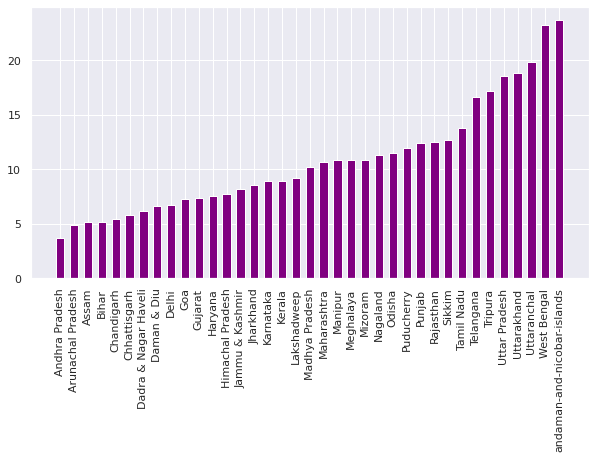

In [ ]:
#Gráfica de barras
import matplotlib.pyplot as plt
height= list(df1['so2'])
bars = list(df1['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="purple", width=0.6)
plt.xticks(rotation=90)
plt.show()

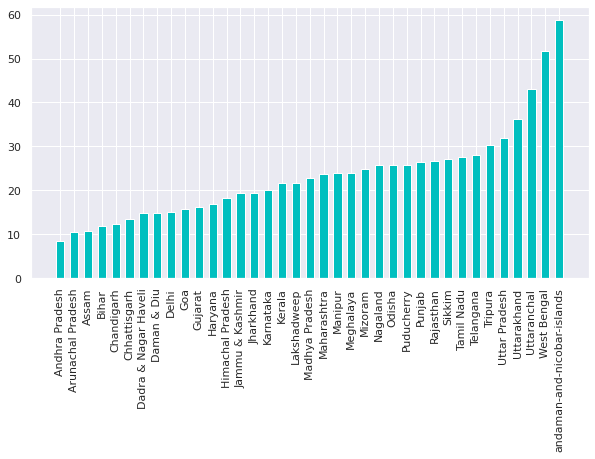

In [ ]:
#Again the same process, but now for NO2 value
height= list(df1['no2'])
bars = list(df1['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="#00BFBF", width=0.6)
plt.xticks(rotation=90)
plt.show()

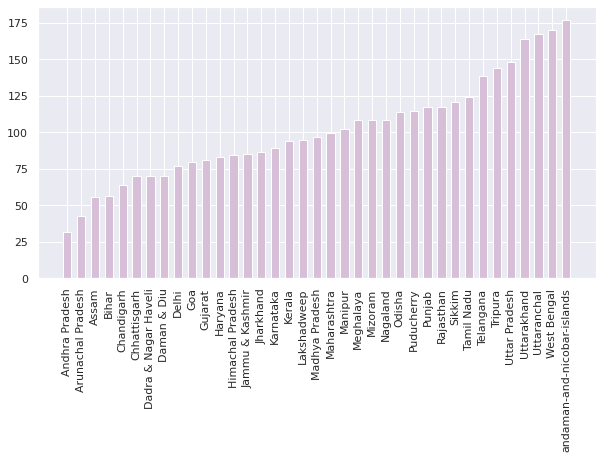

In [ ]:
#Again the same process, but now for rspm value
height= list(df1['rspm'])
bars = list(df1['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="thistle", width=0.6)
plt.xticks(rotation=90)
plt.show()

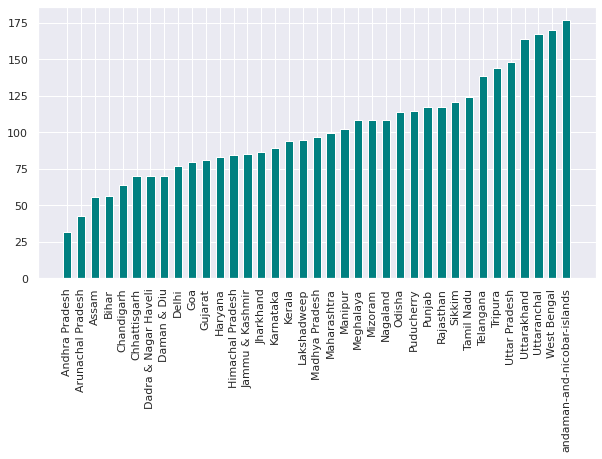

In [ ]:
#Again the same process, but now for spm value
height= list(df1['rspm'])
bars = list(df1['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="teal", width=0.6)
plt.xticks(rotation=90)
plt.show()

##What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

In [ ]:
df2=df[df["state"]=="Andhra Pradesh"].groupby("year")
Datos=df2.first()
Datos=Datos.reset_index()


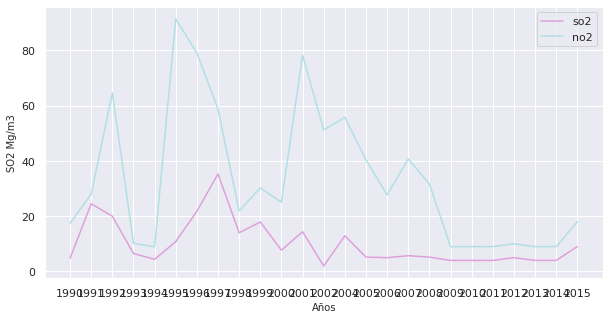

In [ ]:
from matplotlib import axis
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
#We have created a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’.
y1 = Datos["so2"]
y2 = Datos["no2"]
x = Datos["year"]
plt.figure(figsize=(10,5))
plt.plot(x, y1, label='so2', color="plum")
plt.plot(x, y2, label='no2', color="powderblue")
plt.xlabel('Años', fontsize=10)
plt.ylabel('SO2 Mg/m3', fontsize=10)
plt.grid(True)
plt.legend()

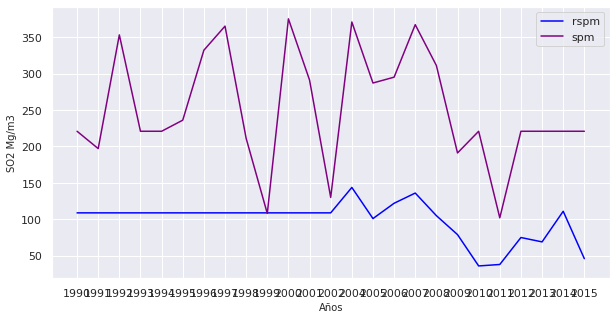

In [ ]:
y1 = Datos["rspm"]
y2 = Datos["spm"]
x = Datos["year"]
plt.figure(figsize=(10,5))
plt.plot(x, y1, label='rspm', color="blue")
plt.plot(x, y2, label='spm', color="purple")
plt.xlabel('Años', fontsize=10)
plt.ylabel('SO2 Mg/m3', fontsize=10)
plt.grid(True)
plt.legend()